# **Dimensionality reduction**

## Description of the [dataset](https://drive.google.com/file/d/1w1pT3woumetRcI3u4T485PyCKuxE_R0v/view?usp=sharing)




---


This data set contains the ground state energies of 16 242 molecules calculated using quantum mechanical simulations.

The data contains 1277 columns. The first 1275 columns are entries in the Coulomb matrix that act as molecular features. The 1276th column is Pubchem Id, where the molecular structures are obtained. The 1277th column is the atomization energy calculated by simulation using the Quantum Espresso package.

The purpose is to use machine learning methods to predict atomization energy from a database of simulations.


---

We will add SMILES and a few more descriptors obtained from PubChem. You can find the code below.

In [48]:
#Install required libraries
!pip install pubchempy
import pubchempy as pcp

In [49]:
import pandas as pd
#Read data
df = pd.read_csv('/content/regina_data_after_encoding.csv')

df

,Unnamed: 0,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,...,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi,encoded_smiles
0,0,0.722315,0.722720,0.571429,0.142857,0.500000,0.2,0.571429,1.000000,0.380952,...,0.381276,0.199311,0.199311,0.119527,0.526316,0.573351,0.238653,0.109714,0.176425,0.041277
1,1,0.667914,0.668734,0.142857,0.000000,0.500000,0.0,0.142857,1.000000,0.714286,...,0.628567,0.127375,0.127375,0.093626,0.747368,0.926242,0.947273,0.944287,0.905486,0.457868
2,2,0.685668,0.686211,0.428571,0.142857,0.000000,0.2,0.285714,1.000000,0.476190,...,0.589505,0.323265,0.323265,0.237680,0.615789,0.398637,0.141015,0.077817,0.087235,0.431322
3,3,0.686084,0.686359,0.714286,0.428571,0.166667,0.4,0.714286,1.000000,0.476190,...,0.370085,0.139847,0.139847,0.090763,0.336842,0.518916,0.209780,0.110234,0.147030,0.618602
4,4,0.630127,0.630670,0.428571,0.142857,0.000000,0.2,0.428571,1.000000,0.428571,...,0.545918,0.349155,0.349155,0.284298,0.689474,0.418388,0.125011,0.058020,0.080728,0.905581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19886,19886,0.388837,0.389195,0.428571,0.142857,0.500000,0.2,0.285714,0.666667,0.238095,...,0.169465,0.046123,0.046123,0.033491,0.315789,0.646578,0.466856,0.360915,0.404468,0.002112
19887,19887,0.685202,0.685470,0.714286,0.142857,0.000000,0.2,0.714286,1.000000,0.285714,...,0.268417,0.107049,0.107049,0.066339,0.268421,0.499279,0.199601,0.124059,0.137122,0.582655
19888,19888,0.686342,0.687026,0.285714,0.142857,0.333333,0.2,0.285714,1.000000,0.666667,...,0.670125,0.338976,0.338976,0.214963,0.721053,0.629378,0.221081,0.110353,0.175039,0.482102
19889,19889,0.630593,0.631410,0.142857,0.142857,0.333333,0.2,0.142857,1.000000,0.619048,...,0.647120,0.356350,0.356350,0.270577,0.747368,0.636954,0.273533,0.112551,0.214423,0.502212


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19891 entries, 0 to 19890
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       19891 non-null  int64  
 1   exactmw                          19891 non-null  float64
 2   amw                              19891 non-null  float64
 3   lipinskiHBA                      19891 non-null  float64
 4   lipinskiHBD                      19891 non-null  float64
 5   NumRotatableBonds                19891 non-null  float64
 6   NumHBD                           19891 non-null  float64
 7   NumHBA                           19891 non-null  float64
 8   NumHeavyAtoms                    19891 non-null  float64
 9   NumAtoms                         19891 non-null  float64
 10  NumHeteroatoms                   19891 non-null  float64
 11  NumAmideBonds                    19891 non-null  float64
 12  FractionCSP3      

## Prepare dataset and variables

[Complete dataset](https://drive.google.com/file/d/1rAj5q7c4v5EeXjgJoyDEtUO02ebul2_R/view?usp=sharing) will be used below.

In [51]:
#Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [52]:
#Divide data into X - numeric descriptors and Y - target
X = df.drop(['NumHeavyAtoms','exactmw','encoded_smiles','Unnamed: 0'],axis=1)
Y = df['NumHeavyAtoms']

#Scale X in range [0, 1]
# X_norm = MinMaxScaler().fit_transform(X)

## **Principal Component Analysis**

Principal component analysis (**PCA**) is a mathematical algorithm that reduces the dimensionality of the data while retaining most of the variation in the data set. It accomplishes this reduction by identifying directions, called **principal components** (PC), along which the variation in the data is maximum.

### *1. Step by step implementation of PCA with python*

In [53]:
def PCA_implementation(X , num_components):

    #Subtract the mean of each variable
    X_meaned = X - np.mean(X , axis = 0)

    #Calculate the Covariance Matrix
    cov_mat = np.cov(X_meaned , rowvar = False)

    #Compute the Eigenvalues and Eigenvectors
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #Sort Eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    #Select a subset from the rearranged Eigenvalue matrix
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    #Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

    return X_reduced

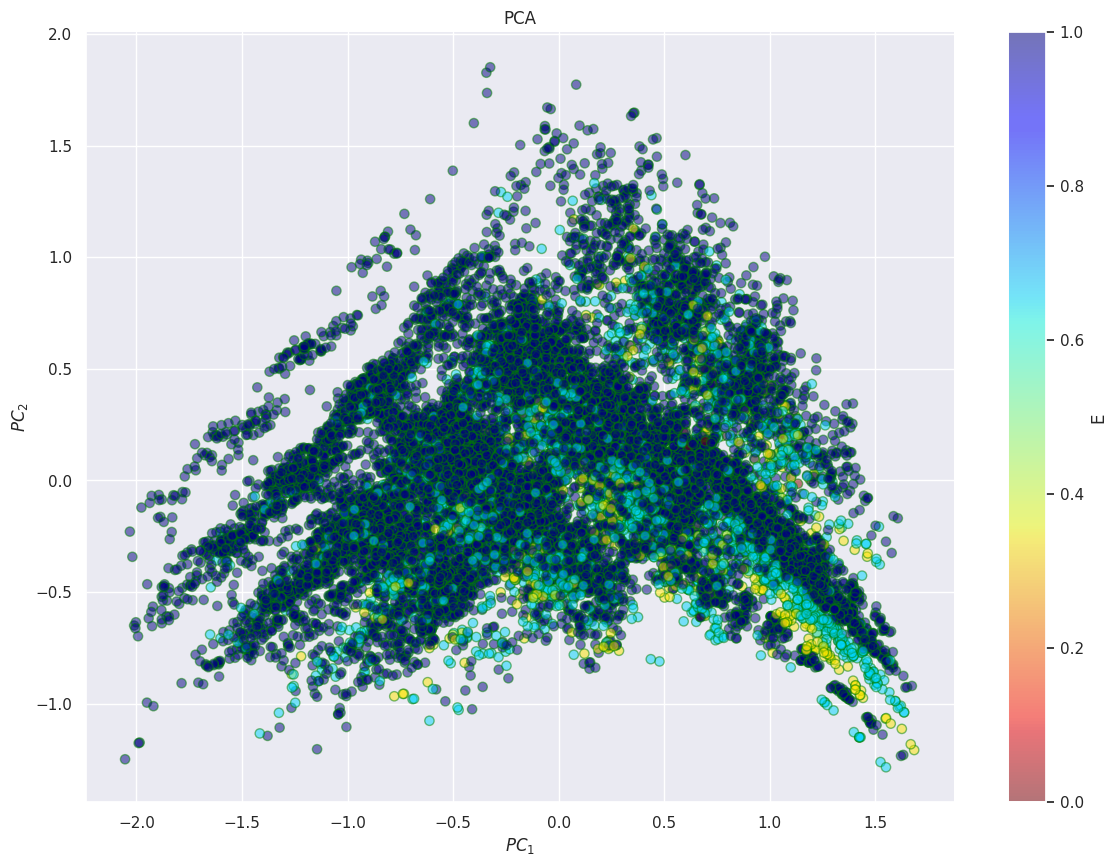

In [54]:
#Perform PCA with two principal components
X_reduced = PCA_implementation(X, 2)

#Plot results colored by target values
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_reduced[:,0], -X_reduced[:,1], c=Y, s=45, edgecolors='green', cmap=cm.jet_r, alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$PC_1$')
plt.ylabel(r'$PC_2$')
plt.title('PCA')
sns.despine()
plt.show()

Scikit-learn allows to use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) in Python. In scikit-learn, PCA is implemented as a transformer object that learns components in its fit method, and can be used on new data to project it on these components.

### *2. How to select number of components?*

In [55]:
#Import required libraries
from sklearn.decomposition import PCA

**Method 1**: Specify the explained variance

In [56]:
#Perform PCA with specified variance of 95%
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X)

#Print results
print('Original Dimensions: ',X.shape)
print('Reduced Dimensions: ',X_reduced.shape)
print("Explained variance: ", pca.explained_variance_ratio_.sum())

Original Dimensions:  (19891, 41)
Reduced Dimensions:  (19891, 11)
Explained variance:  0.9602363761640734


**95%** of variance is observed with **11 dimensions** or principal components

**Method 2** : Select using a plot with cumulative explained variance

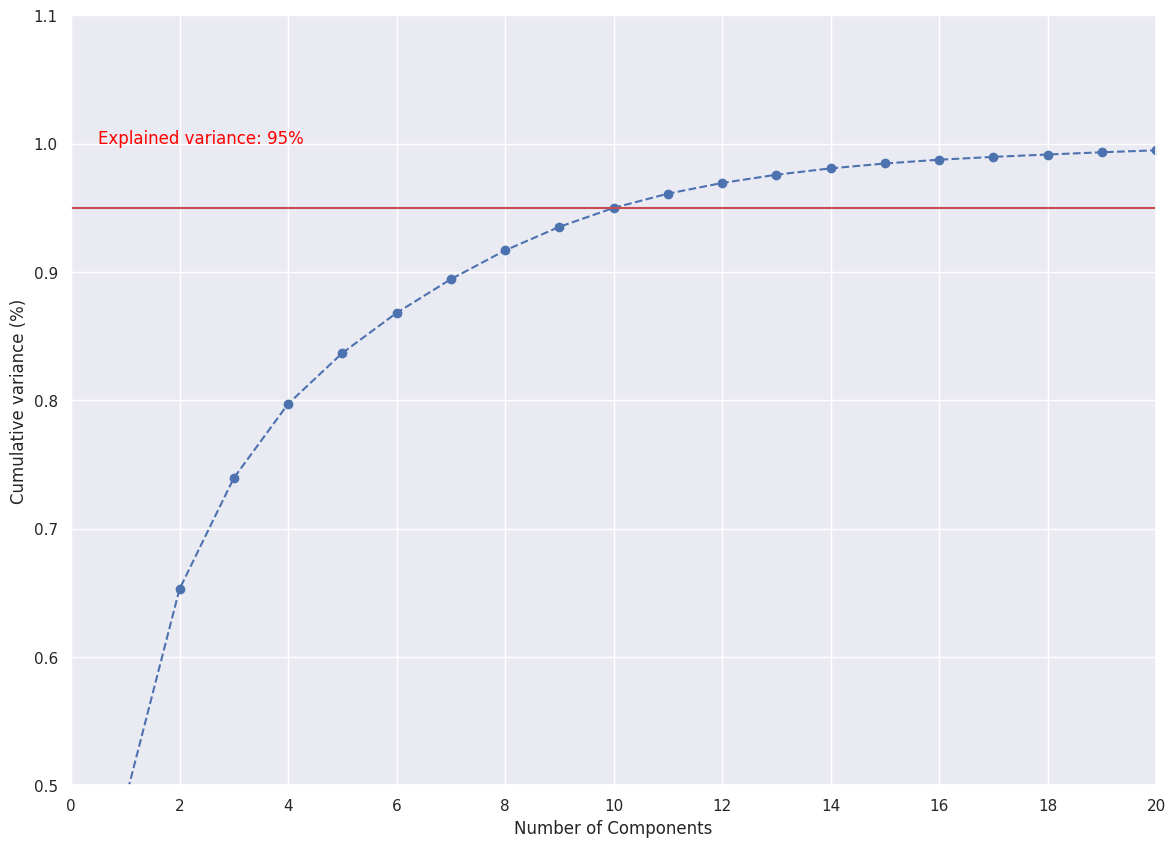

In [57]:
#Perform PCA
pca = PCA()
X_reduced = pca.fit_transform(X_norm)

#Calculate cumulative variance
y = np.cumsum(pca.explained_variance_ratio_)

#Calculate principal components
xi = np.arange(1, y.shape[0]+1, step=1)

#Plot results
plt.ylim(0.5,1.1)
plt.xlim(0.0,15.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 21, step=2))
plt.ylabel('Cumulative variance (%)')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 1, 'Explained variance: 95%', color = 'red', fontsize=12)
ax.grid(axis='x')
plt.show()

We got the same result. 95% of the dispersion is observed with 11 principal components.

**Method 3**: Eigenvalue criterion

<Axes: title={'center': 'Component Variance'}, xlabel='PCs', ylabel='Eigenvalues'>

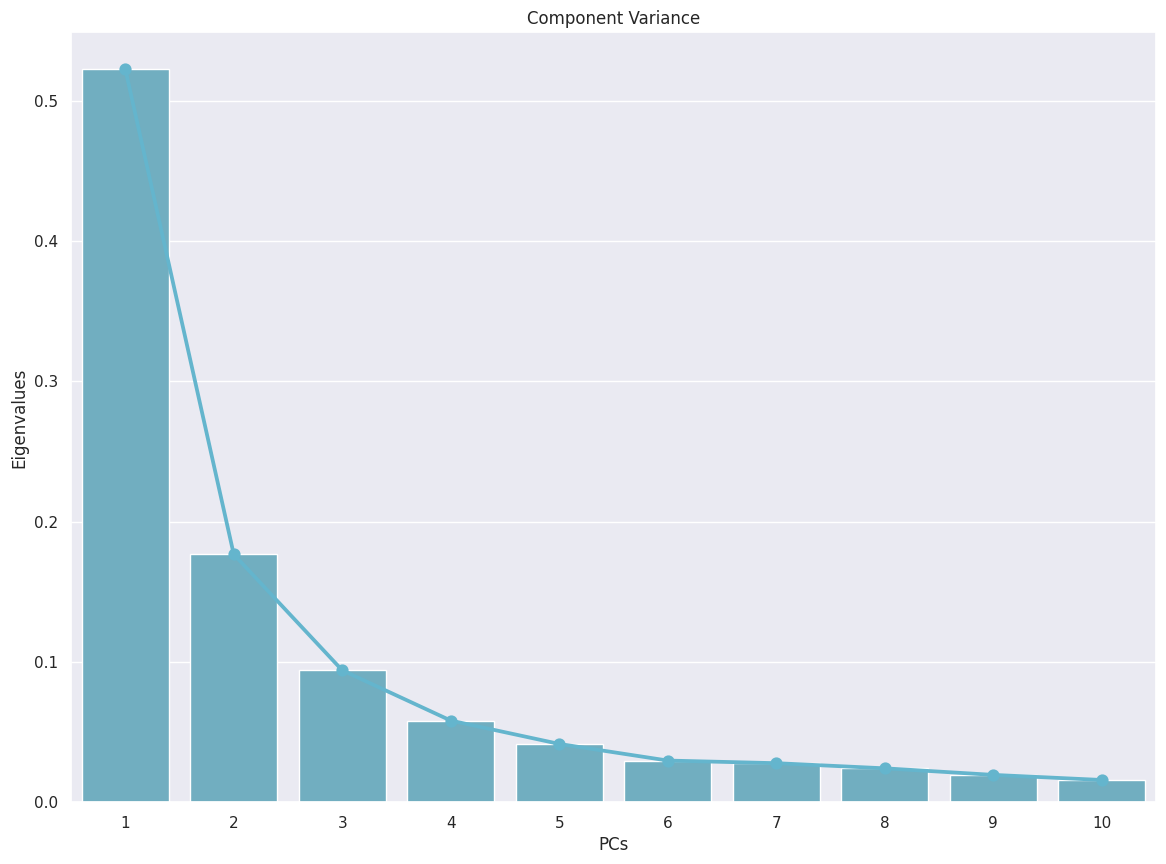

In [58]:
#Perform PCA
pca = PCA()
X_reduced = pca.fit_transform(X)

#Calculate explained variance for each PC
dfScree = pd.DataFrame({'Eigenvalues':pca.explained_variance_,'PCs':[i for i in range(1,pca.n_components_+1)]})

#Plot the variance explained by each component
sns.barplot(x='PCs',y="Eigenvalues",data=dfScree[0:10], color="c").set_title('Component Variance')
sns.pointplot(x='PCs',y="Eigenvalues",data=dfScree[0:10], color="c")

The plot displays how much variation each principal component captures from the data. The y axis is eigenvalues, which essentially stands for the amount of variation. As a general rule of thumb, we should select the number of components that have an eigenvalue greater than 1. Based on the above scree plot we should choose to keep 2 components. This is very different to the previous cumulative variance plot where we chose to retain 12 components.

A higher explained variance, captures more variability in dataset, which could potentially lead to better performance when training a model. However, if we choose to retain 2 components, this explains less than 80% of the variability. This is much lower than the variability captured when retaining 12 components (95%). At this point, we need to decide whether a cumulative variance of 80% is satisfactory based on their domain knowledge and other research in the area.

### *3. Explain the components*

In [59]:
#Perform PCA with 12 components
pca = PCA(n_components=11)
X_reduced = pca.fit_transform(X_norm)

**a) Check correlations with original data and try to interpret PCs**

In [60]:
#Combine the original data (X_pubchem) and first three PCs
df_pc = pd.DataFrame(data = X_reduced, columns = [f'PC{i}' for i in range(1,12)])
df_col = pd.concat([df_pc[['PC1','PC2','PC3']],pd.DataFrame(X, columns=X.columns)], axis=1)
df_col

,PC1,PC2,PC3,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumAtoms,...,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,-0.583872,-0.030925,-0.361487,0.722720,0.571429,0.142857,0.500000,0.2,0.571429,0.380952,...,0.393994,0.381276,0.199311,0.199311,0.119527,0.526316,0.573351,0.238653,0.109714,0.176425
1,-0.380038,1.498661,0.042408,0.668734,0.142857,0.000000,0.500000,0.0,0.142857,0.714286,...,0.724547,0.628567,0.127375,0.127375,0.093626,0.747368,0.926242,0.947273,0.944287,0.905486
2,0.198706,-0.137404,-0.148552,0.686211,0.428571,0.142857,0.000000,0.2,0.285714,0.476190,...,0.499824,0.589505,0.323265,0.323265,0.237680,0.615789,0.398637,0.141015,0.077817,0.087235
3,-1.008538,-0.254104,-0.001821,0.686359,0.714286,0.428571,0.166667,0.4,0.714286,0.476190,...,0.537239,0.370085,0.139847,0.139847,0.090763,0.336842,0.518916,0.209780,0.110234,0.147030
4,0.236183,-0.302371,-0.269875,0.630670,0.428571,0.142857,0.000000,0.2,0.428571,0.428571,...,0.450495,0.545918,0.349155,0.349155,0.284298,0.689474,0.418388,0.125011,0.058020,0.080728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19886,-1.185329,0.153742,-0.183971,0.389195,0.428571,0.142857,0.500000,0.2,0.285714,0.238095,...,0.253034,0.169465,0.046123,0.046123,0.033491,0.315789,0.646578,0.466856,0.360915,0.404468
19887,-1.206128,-0.512614,0.130957,0.685470,0.714286,0.142857,0.000000,0.2,0.714286,0.285714,...,0.392760,0.268417,0.107049,0.107049,0.066339,0.268421,0.499279,0.199601,0.124059,0.137122
19888,0.121444,0.491546,0.048543,0.687026,0.285714,0.142857,0.333333,0.2,0.285714,0.666667,...,0.677105,0.670125,0.338976,0.338976,0.214963,0.721053,0.629378,0.221081,0.110353,0.175039
19889,0.283771,0.490719,0.074392,0.631410,0.142857,0.142857,0.333333,0.2,0.142857,0.619048,...,0.594928,0.647120,0.356350,0.356350,0.270577,0.747368,0.636954,0.273533,0.112551,0.214423


In [61]:
df_col = df_col.reset_index(drop=True)

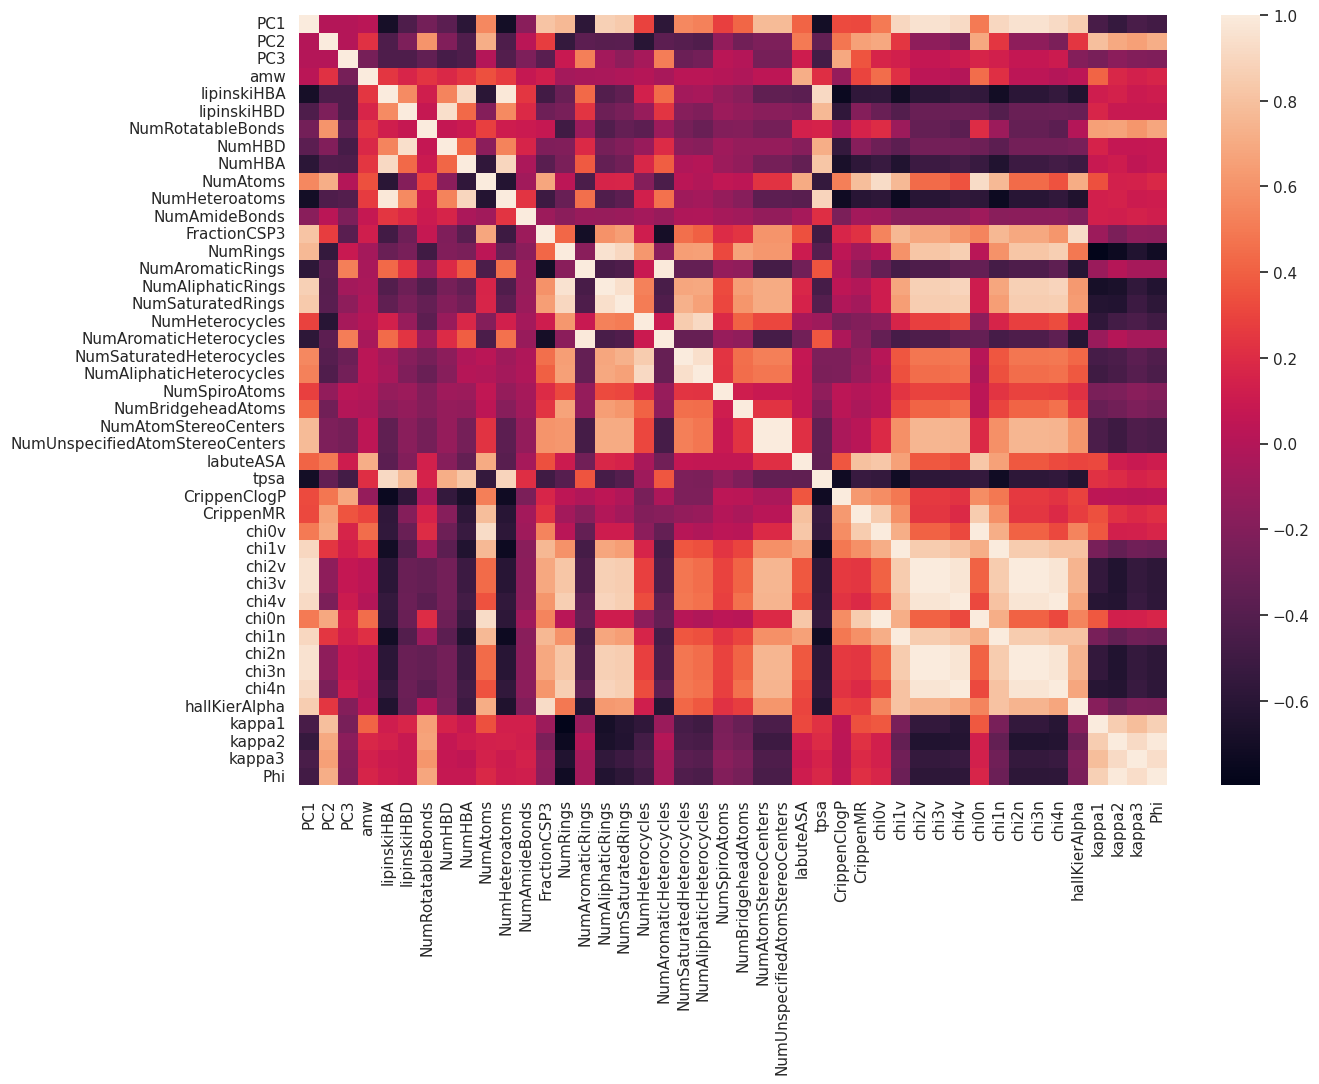

<Figure size 3500x3000 with 0 Axes>

In [62]:
#Compute the correlations between the original data and PCs
corMatrix = df_col.select_dtypes(include='float64').corr()

#Plot the results
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(corMatrix, fmt='.3f')
plt.figure(figsize=(35,30))
plt.show()

First of all, note that PCs are not correlated with each other.

Considering only correlations with descriptors obtained from PubChem:
* PC1 — The first PC increases with increasing of the original variables - "MW", "complexity", "rotatable_bon_count". This PC can be viewed as a measure of complexity of molecular structure.

* PC2 — The second PC increases with decreasing of "MW", "complexity".

* PC3 — The third PC decreases with "tpsa", "HBA". It can be thought of as a measure of how polar a molecule is, how strong the donor or acceptor properties are.

**b) Visualize the impact of original variables on PCs**

In [63]:
df_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19891 entries, 0 to 19890
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PC1                              19891 non-null  float64
 1   PC2                              19891 non-null  float64
 2   PC3                              19891 non-null  float64
 3   amw                              19891 non-null  float64
 4   lipinskiHBA                      19891 non-null  float64
 5   lipinskiHBD                      19891 non-null  float64
 6   NumRotatableBonds                19891 non-null  float64
 7   NumHBD                           19891 non-null  float64
 8   NumHBA                           19891 non-null  float64
 9   NumAtoms                         19891 non-null  float64
 10  NumHeteroatoms                   19891 non-null  float64
 11  NumAmideBonds                    19891 non-null  float64
 12  FractionCSP3      

In [67]:
features

['PC1',
 'PC2',
 'PC3',
 'amw',
 'lipinskiHBA',
 'lipinskiHBD',
 'NumRotatableBonds',
 'NumHBD',
 'NumHBA',
 'NumAtoms',
 'NumHeteroatoms',
 'NumAmideBonds',
 'FractionCSP3',
 'NumRings',
 'NumAromaticRings',
 'NumAliphaticRings',
 'NumSaturatedRings',
 'NumHeterocycles',
 'NumAromaticHeterocycles',
 'NumSaturatedHeterocycles',
 'NumAliphaticHeterocycles',
 'NumSpiroAtoms',
 'NumBridgeheadAtoms',
 'NumAtomStereoCenters',
 'NumUnspecifiedAtomStereoCenters',
 'labuteASA',
 'tpsa',
 'CrippenClogP',
 'CrippenMR',
 'chi0v',
 'chi1v',
 'chi2v',
 'chi3v',
 'chi4v',
 'chi0n',
 'chi1n',
 'chi2n',
 'chi3n',
 'chi4n',
 'hallKierAlpha',
 'kappa1',
 'kappa2',
 'kappa3',
 'Phi']

In [68]:
for i in range(loadings.shape[0]):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0]*100,
        y1=loadings[i, 1]*100
    )
    fig.add_annotation(
        x=loadings[i, 0]*120,
        y=loadings[i, 1]*120,
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=features[i],  # Access feature at the corresponding index
    )


The plot shows how strongly each descriptor (vector) influence the principal components. The results confirm the correlation matrix obtained above.

**c) Visualize separation of target variable using PCs**

In [69]:
#Create labels for Y
bins = np.linspace(round(Y.min(),0)-1, round(Y.max(),0)+1, num = 6)
Y_labels = np.digitize(Y, bins)

<Axes: xlabel='Y_labels', ylabel='PC1'>

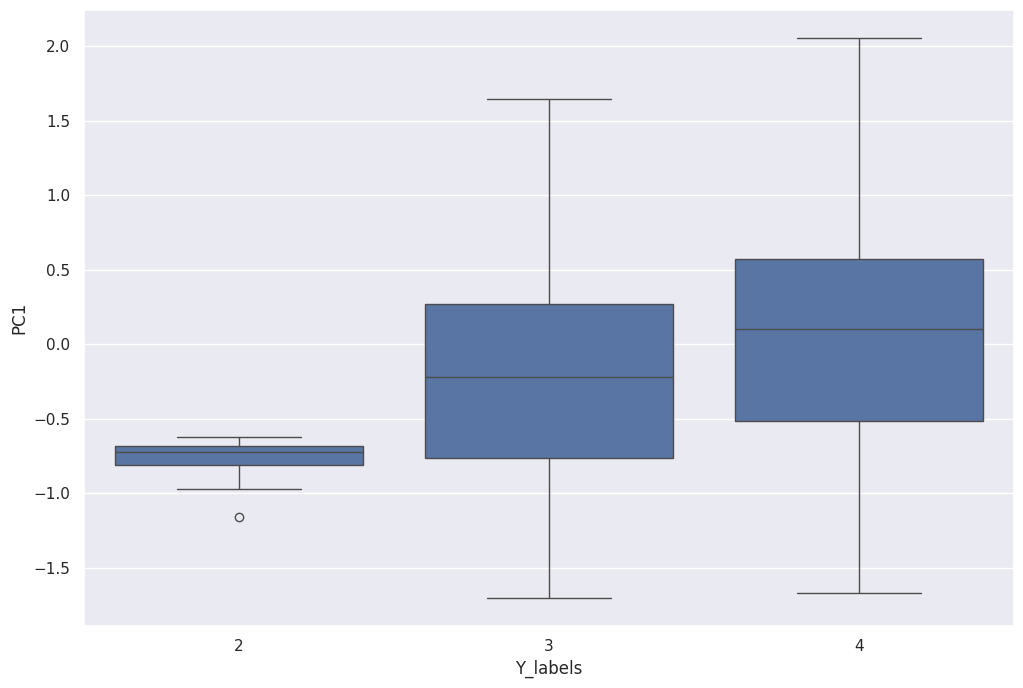

In [70]:
#Plot the distribution of target per component
target_PCA=pd.DataFrame(zip(X_reduced[:,0],X_reduced[:,1],Y_labels),columns=["PC1","PC2","Y_labels"])

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x='Y_labels', y='PC1', data=target_PCA)

<Axes: xlabel='Y_labels', ylabel='PC2'>

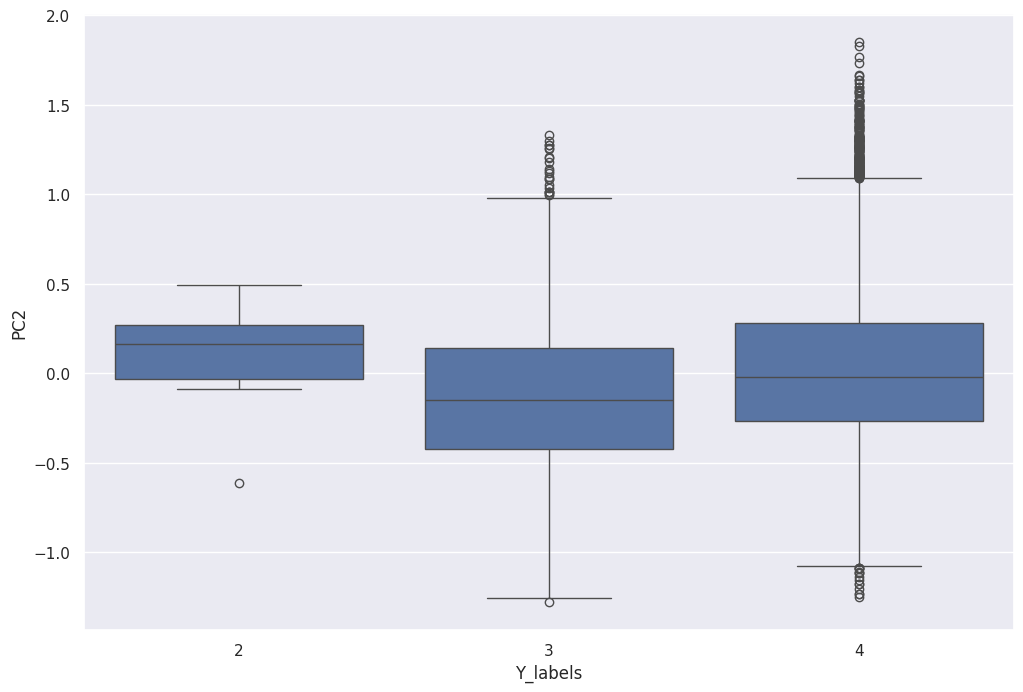

In [71]:
#Plot graphs
sns.boxplot(x='Y_labels', y='PC2', data=target_PCA)

The above plots show how the PCA has distributed the dataset based on their target variables in different components. We can also see that some classes contain outliers.

## **Linear Discriminant Analysis**

Linear Discriminant Analysis (**LDA**) is a **supervised** machine learning method that is used **to separate two or more classes** of objects or events. The main idea of LDA is to maximize the separability between the groups so that we can make the best decision to classify them.

LDA can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions. **The dimension of the output is necessarily less than the number of classes**, so this is in general a rather strong dimensionality reduction, and only makes sense in a multiclass setting. In scikit-learn, [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis) is implemented as a transformer object that learns components in its fit method, and can be used on new data to project it on these components.

In [ ]:
#Import required libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

Both PCA and LDA are linear transformation methods. However, PCA is unsupervised, while LDA is a supervised dimensionality reduction method. Thus, in order to use LDA, target labels must be specified. If your target is numeric you can just binarize it.

In [ ]:
#Binarize Y
bins = np.linspace(round(Y.min(),0)-1, round(Y.max(),0)+1, num = 6)
Y_labels = np.digitize(Y, bins)

In [ ]:
#Perform LDA
lda = LDA()
X_lda = lda.fit_transform(X_norm,Y_labels)

#Print number of components
X_lda.shape

In [ ]:
#Perform LDA with 4 components
lda = LDA(n_components=4)
X_lda = lda.fit_transform(X_norm,Y_labels)

In [ ]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_lda[:, 0], X_lda[:, 1], c = Y_labels, s=60, edgecolors='black', cmap=cm.jet_r)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$LDA_1$')
plt.ylabel(r'$LDA_2$')
sns.despine()
plt.show()

In [ ]:
#Print explained variance
lda.explained_variance_ratio_.sum()

LDA explains 100% of original variance with 4 components and allows separation and visualization of target labels.

## **Independent Component Analysis**

Independent Component Analysis (**ICA**) is a linear technique that aims to find a lower-dimensional representation of the data that is statistically independent. It works by decomposing the data into a set of independent components, each of which represents a different source of variation in the data.

It is implemented in scikit-learn using the [Fast ICA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html#sklearn.decomposition.FastICA) algorithm.

In [ ]:
#Import required libraries
from sklearn.decomposition import FastICA

In [ ]:
#Perform ICA with 2 components
ica = FastICA(n_components = 2)
X_ica = ica.fit_transform(X_norm)

In [ ]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_ica[:, 0], X_ica[:, 1], c = Y, s=60, edgecolors='black', cmap=cm.jet_r)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$ICA_1$')
plt.ylabel(r'$ICA_2$')
sns.despine()
plt.show()

## **Kernel PCA**

Kernel PCA is an extension of PCA which achieves non-linear dimensionality reduction through the use of kernels. It has many applications including denoising, compression and structured prediction (kernel dependency estimation). In scikit-learn, [KernelPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) supports both transform and inverse_transform.

In [ ]:
#Import required libraries
from sklearn.decomposition import KernelPCA

In [ ]:
#Perform kernel PCA with sigmoid kernel
sigmoid_pca = KernelPCA(n_components = 2, kernel='sigmoid', gamma=0.01)
X_sigmoid = sigmoid_pca.fit_transform(X_norm)

In [ ]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_sigmoid[:, 0], X_sigmoid[:, 1], c = Y, s=60, edgecolors='black', cmap=cm.jet_r)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$k-PCA_1$')
plt.ylabel(r'$k-PCA_2$')
sns.despine()
plt.show()

In [ ]:
#Calculate the explained variance
explained_variance = np.var(X_sigmoid, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print("Variance Explained: ", np.sum(explained_variance_ratio))

Kernel PCA, with a sigmoid kernel, explains 100% of the original variance of our data with only 2 components, perfect for visualization purposes.

## **T-distributed Stochastic Neighbor Embedding**

T-distributed Stochastic Neighbor Embedding (**t-SNE**) is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

In scikit-learn, [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE) only supports transform with a fit function at the same time.

In [72]:
#Import required libraries
from sklearn.manifold import TSNE

In [78]:
#Perform t-SNE
tsne = TSNE(n_components=3, perplexity=50)
X_tsne = tsne.fit_transform(X)

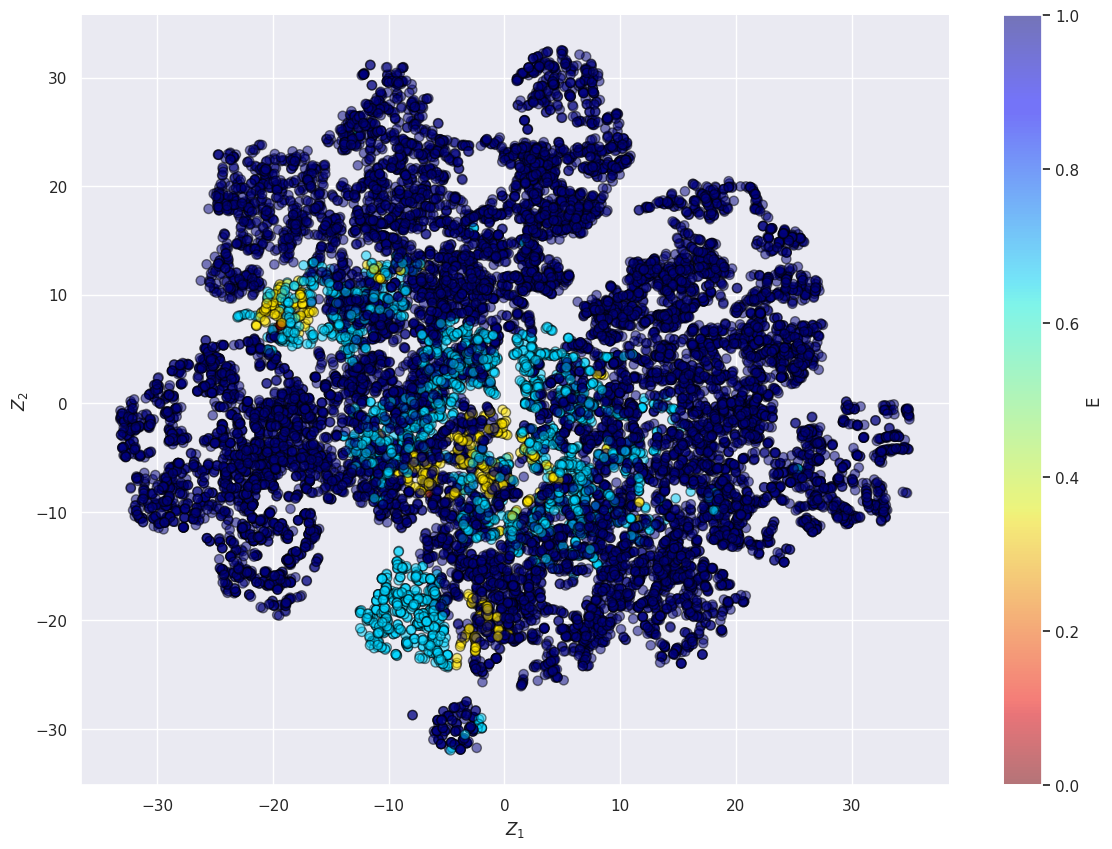

In [79]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_tsne[:,0], X_tsne[:,1], c=Y, s=45, edgecolors='black', cmap=cm.jet_r, alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
sns.despine()
plt.show()

In [75]:
print('New Shape of X: ', X_tsne.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)

New Shape of X:  (19891, 2)
Kullback-Leibler divergence after optimization:  1.0256785154342651
No. of iterations:  999
